# Superstore Case Study
## Introduction

Superstore is seeking expertise to determine what works best for them in light of the market's intensifying competition and rising demand. They want to know which items, geographies, categories, and consumer groups to target and which to avoid. It is necessary to develop a regression model in order to forecast sales and profits and get insights on how to enhance operations in general.




## Objectives

The purpose of this analysis is to determine the impact of sales and profit in each category of the dataset. This will advise the shop on how to enhance delivery of orders and what goods to carry.

# ASK

The project aims to analyze the collected data to provide insight into the delivery schedule and locations with the greatest sales and profits. I will provide advice for establishing a business strategy based on the results.


# PREPARE

## Data

The data includes 3 data sets which includes orders, users and returns. We have reduced the dataset's complexity to a single data file.

# Metadata

Row ID => Unique ID for each row.
Order ID = unique order ID for each customer. 
Order Date = Order Date of the product. 
Ship Date => Shipping Date of the Product 
Ship Mode: Shipping Mode specified by the Customer 
Customer ID: A unique ID to identify each customer. 
Customer Name = "Name of the Customer." Segment: The segment to which the customer belongs. 
Country => Country of residence of the customer. city = "city of residence" of the customer. 
State = state of residence of the customer. 
Postal Code: The postal code of every customer. Region: The region to which the customer belongs. 
Product ID is the unique ID of the product. Category: Category of the product ordered. Sub-Category: The category of the product ordered. 
Product Name = "Name of the Product" 
Sales = Sales of the Product. 
Quantity = quantity of the product. 
Discount provided. 
Profit = Profit/Loss incurred.

# PROCESS

It will be used since it can handle massive amounts of data. Moreover, data may be readily cleansed and displayed, facilitating analysis. The data were collected in a zip file before being converted to excel and submitted to R. The materials were submitted for additional review. \ The information is presented in a tabular format with consistent column titles. Additionally, some column names were changed since they were unclear. The data type in the dates is inconsistent; the data appears in the wrong date format, which is "dd/mm/yy," but is really a character and in "mm/dd/yy" format. As a result, the data type is modified to remedy the issue. In addition, the data types of the "started at" and "ended at" columns are specified.

# Analysis



In [1]:
#STEP ONE
#install packages
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("ggpubr")
install.packages("ggrepel")
install.packages("tidymodels")
install.packages("readr")

library("tidyverse")#helps wrangle the data
library("lubridate")#helps wrangle date attributes
library("ggplot2")#helps visualize the data
library("here")#enables easy file referencing by using the top-level directory of a file project to easily build file path
library("skimr")#is designed to provide summary statistics about variables in data frames, tibbles, data tables and vectors
library("janitor")#perfectly format data.frame column names; provide quick counts of variable combinations (
library("ggpubr")#facilitates the creation of beautiful ggplot2-based graphs for researcher with non-advanced programming backgrounds
library("ggrepel")#Provides text and label geoms for 'ggplot2' that help to avoid overlapping text labels. 
library("tidymodels")#used for for modeling and statistical analysis that share the underlying design philosophy, grammar
library("readr")#makes it easy to get rectangular data out of comma separated (csv), tab separated (tsv) or fixed width files (fwf
library("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’


Warning message in install.packages("ggplot2"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timechange’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’


Warning message in install.packages("ggplot2"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘

In [2]:
#Step Two 
getwd()

[1] "/kaggle/working"

In [3]:
setwd('/kaggle/working')

In [5]:
#Upload Data 
library(readxl)
orders <- read_excel("../input/superstore-data-2015/orders.xlsx")
head(orders)
library(readxl)
returns <- read_excel("../input/superstore-data-2015/returns.xlsx")
head(returns)
library(readxl)
users <- read_excel("../input/superstore-data-2015/users.xlsx")
head(users)

Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,⋯,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,⋯,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,⋯,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,⋯,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,⋯,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,⋯,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,⋯,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-37.0300,4,13.99,86838


Order ID,Status
<dbl>,<chr>
65,Returned
612,Returned
614,Returned
678,Returned
710,Returned
740,Returned


Region,Manager
<chr>,<chr>
Central,Chris
East,Erin
South,Sam
West,William


### STEP THREE: WRANGLE DATA AND COMBINE INTO ONE SINGLE FILE 


In [6]:
#Compare all column names in the data sets
str(orders)
str(users)
str(returns)

colnames(orders)
colnames(users)
colnames(returns)

tibble [1,952 × 25] (S3: tbl_df/tbl/data.frame)
 $ Row ID              : num [1:1952] 20847 20228 21776 24844 24846 ...
 $ Order Priority      : chr [1:1952] "High" "Not Specified" "Critical" "Medium" ...
 $ Discount            : num [1:1952] 0.01 0.02 0.06 0.09 0.08 0.05 0.05 0 0.01 0.04 ...
 $ Unit Price          : num [1:1952] 2.84 500.98 9.48 78.69 3.28 ...
 $ Shipping Cost       : num [1:1952] 0.93 26 7.29 19.99 2.31 ...
 $ Customer ID         : num [1:1952] 3 5 11 14 14 14 14 15 15 16 ...
 $ Customer Name       : chr [1:1952] "Bonnie Potter" "Ronnie Proctor" "Marcus Dunlap" "Gwendolyn F Tyson" ...
 $ Ship Mode           : chr [1:1952] "Express Air" "Delivery Truck" "Regular Air" "Regular Air" ...
 $ Customer Segment    : chr [1:1952] "Corporate" "Home Office" "Home Office" "Small Business" ...
 $ Product Category    : chr [1:1952] "Office Supplies" "Furniture" "Furniture" "Furniture" ...
 $ Product Sub-Category: chr [1:1952] "Pens & Art Supplies" "Chairs & Chairmats" "Office Furn

[1] "Row ID"               "Order Priority"       "Discount"            
 [4] "Unit Price"           "Shipping Cost"        "Customer ID"         
 [7] "Customer Name"        "Ship Mode"            "Customer Segment"    
[10] "Product Category"     "Product Sub-Category" "Product Container"   
[13] "Product Name"         "Product Base Margin"  "Country"             
[16] "Region"               "State or Province"    "City"                
[19] "Postal Code"          "Order Date"           "Ship Date"           
[22] "Profit"               "Quantity ordered new" "Sales"               
[25] "Order ID"

[1] "Region"  "Manager"

[1] "Order ID" "Status"

In [7]:
#Note that both datasets have the 'Order Id' field - this can be used to merge the datasets.
#How many unique participants are there in each data frame? It looks like there may be more participants in the daily activity dataset than the sleep dataset
nrow(orders)
nrow(returns)

n_distinct(orders)
n_distinct(returns)

[1] 1952

[1] 1634

[1] 1952

[1] 1634

In [9]:
orders_mangers <- inner_join(orders,users, by="Region")#merge 2 data sets by adding the manager incharge of every region
orders_returned <- inner_join(orders_mangers,returns, by ="Order ID")#identify ordered goods returned
head(orders_returned)
head(orders_mangers)
n_distinct(orders_mangers)
n_distinct(orders_returned)
orders_mangers <- orders_mangers %>% select(-c("Customer Name"))
head(orders_mangers)

Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,⋯,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager,Status
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1950,Medium,0.01,4.91,0.50,117,Linda Weiss,Regular Air,Home Office,Office Supplies,⋯,Seattle,98103,2015-04-04,2015-04-06,112.060,47,228.46,13959,William,Returned
1951,Medium,0.09,4.00,1.30,117,Linda Weiss,Express Air,Home Office,Office Supplies,⋯,Seattle,98103,2015-04-04,2015-04-06,16.790,19,77.61,13959,William,Returned
5302,High,0.01,8.33,1.99,308,Glen Caldwell,Regular Air,Small Business,Technology,⋯,Seattle,98115,2015-02-14,2015-02-15,10.740,32,280.62,37760,William,Returned
1147,Medium,0.08,2.94,0.96,491,Toni Swanson,Regular Air,Consumer,Office Supplies,⋯,New York City,10154,2015-05-15,2015-05-17,-2.120,23,66.70,8353,Erin,Returned
2368,Medium,0.00,6.88,2.00,553,Kristine Connolly,Express Air,Home Office,Office Supplies,⋯,Los Angeles,90008,2015-01-28,2015-01-29,34.068,36,267.53,17155,William,Returned
7893,Not Specified,0.00,236.97,59.24,640,Neal Wolfe,Delivery Truck,Consumer,Furniture,⋯,Seattle,98119,2015-02-14,2015-02-15,1192.040,34,6686.34,56452,William,Returned


Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,⋯,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,⋯,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,William
20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,⋯,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,William
21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,⋯,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,Erin
24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,Chris
24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,Chris
24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-37.0300,4,13.99,86838,Chris


[1] 1952

[1] 15

Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Category,Product Sub-Category,⋯,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
20847,High,0.01,2.84,0.93,3,Express Air,Corporate,Office Supplies,Pens & Art Supplies,⋯,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,William
20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,⋯,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,William
21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,Furniture,Office Furnishings,⋯,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,Erin
24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Furniture,Office Furnishings,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,Chris
24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,Chris
24847,Medium,0.05,3.28,4.20,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-37.0300,4,13.99,86838,Chris


### STEP FOUR: CLEAN DATA AND ADD DATA TO PREPARE FOR ANALYSIS

In [10]:

#inspect the new created table orders_mangers
colnames(orders_mangers)
nrow(orders_mangers)
dim(orders_mangers) 
head(orders_mangers)
str(orders_mangers)

[1] "Row ID"               "Order Priority"       "Discount"            
 [4] "Unit Price"           "Shipping Cost"        "Customer ID"         
 [7] "Ship Mode"            "Customer Segment"     "Product Category"    
[10] "Product Sub-Category" "Product Container"    "Product Name"        
[13] "Product Base Margin"  "Country"              "Region"              
[16] "State or Province"    "City"                 "Postal Code"         
[19] "Order Date"           "Ship Date"            "Profit"              
[22] "Quantity ordered new" "Sales"                "Order ID"            
[25] "Manager"

[1] 1952

[1] 1952   25

Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Category,Product Sub-Category,⋯,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Manager
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
20847,High,0.01,2.84,0.93,3,Express Air,Corporate,Office Supplies,Pens & Art Supplies,⋯,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,William
20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,⋯,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,William
21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,Furniture,Office Furnishings,⋯,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,Erin
24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Furniture,Office Furnishings,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,Chris
24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,Chris
24847,Medium,0.05,3.28,4.20,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-37.0300,4,13.99,86838,Chris


tibble [1,952 × 25] (S3: tbl_df/tbl/data.frame)
 $ Row ID              : num [1:1952] 20847 20228 21776 24844 24846 ...
 $ Order Priority      : chr [1:1952] "High" "Not Specified" "Critical" "Medium" ...
 $ Discount            : num [1:1952] 0.01 0.02 0.06 0.09 0.08 0.05 0.05 0 0.01 0.04 ...
 $ Unit Price          : num [1:1952] 2.84 500.98 9.48 78.69 3.28 ...
 $ Shipping Cost       : num [1:1952] 0.93 26 7.29 19.99 2.31 ...
 $ Customer ID         : num [1:1952] 3 5 11 14 14 14 14 15 15 16 ...
 $ Ship Mode           : chr [1:1952] "Express Air" "Delivery Truck" "Regular Air" "Regular Air" ...
 $ Customer Segment    : chr [1:1952] "Corporate" "Home Office" "Home Office" "Small Business" ...
 $ Product Category    : chr [1:1952] "Office Supplies" "Furniture" "Furniture" "Furniture" ...
 $ Product Sub-Category: chr [1:1952] "Pens & Art Supplies" "Chairs & Chairmats" "Office Furnishings" "Office Furnishings" ...
 $ Product Container   : chr [1:1952] "Wrap Bag" "Jumbo Drum" "Small Pack" "S

In [11]:
#Add columns that list date,month,day and year 
orders_mangers$date <- as.Date(orders_mangers$`Order Date`) #The default format is yyyy-mm-dd
orders_mangers$day <- format(as.Date(orders_mangers$date), "%d")
orders_mangers$day_of_week <- format(as.Date(orders_mangers$date), "%A")
orders_mangers$Month <- format(orders_mangers$date, "%b")# change month numbers to dates 
orders_mangers$year <- format(as.Date(orders_mangers$date), "%Y")

head(orders_mangers)

Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Category,Product Sub-Category,⋯,Profit,Quantity ordered new,Sales,Order ID,Manager,date,day,day_of_week,Month,year
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
20847,High,0.01,2.84,0.93,3,Express Air,Corporate,Office Supplies,Pens & Art Supplies,⋯,4.5600,4,13.01,88522,William,2015-01-07,07,Wednesday,Jan,2015
20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,⋯,4390.3665,12,6362.85,90193,William,2015-06-13,13,Saturday,Jun,2015
21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,Furniture,Office Furnishings,⋯,-53.8096,22,211.15,90192,Erin,2015-02-15,15,Sunday,Feb,2015
24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Furniture,Office Furnishings,⋯,803.4705,16,1164.45,86838,Chris,2015-05-12,12,Tuesday,May,2015
24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,-24.0300,7,22.23,86838,Chris,2015-05-12,12,Tuesday,May,2015
24847,Medium,0.05,3.28,4.20,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,-37.0300,4,13.99,86838,Chris,2015-05-12,12,Tuesday,May,2015


In [12]:
# Shipping duration
orders_mangers$orderduration <- difftime(orders_mangers$`Ship Date`,orders_mangers$`Order Date`, units = c("hours"))
str(orders_mangers)
head(orders_mangers)

tibble [1,952 × 31] (S3: tbl_df/tbl/data.frame)
 $ Row ID              : num [1:1952] 20847 20228 21776 24844 24846 ...
 $ Order Priority      : chr [1:1952] "High" "Not Specified" "Critical" "Medium" ...
 $ Discount            : num [1:1952] 0.01 0.02 0.06 0.09 0.08 0.05 0.05 0 0.01 0.04 ...
 $ Unit Price          : num [1:1952] 2.84 500.98 9.48 78.69 3.28 ...
 $ Shipping Cost       : num [1:1952] 0.93 26 7.29 19.99 2.31 ...
 $ Customer ID         : num [1:1952] 3 5 11 14 14 14 14 15 15 16 ...
 $ Ship Mode           : chr [1:1952] "Express Air" "Delivery Truck" "Regular Air" "Regular Air" ...
 $ Customer Segment    : chr [1:1952] "Corporate" "Home Office" "Home Office" "Small Business" ...
 $ Product Category    : chr [1:1952] "Office Supplies" "Furniture" "Furniture" "Furniture" ...
 $ Product Sub-Category: chr [1:1952] "Pens & Art Supplies" "Chairs & Chairmats" "Office Furnishings" "Office Furnishings" ...
 $ Product Container   : chr [1:1952] "Wrap Bag" "Jumbo Drum" "Small Pack" "S

Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Category,Product Sub-Category,⋯,Quantity ordered new,Sales,Order ID,Manager,date,day,day_of_week,Month,year,orderduration
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
20847,High,0.01,2.84,0.93,3,Express Air,Corporate,Office Supplies,Pens & Art Supplies,⋯,4,13.01,88522,William,2015-01-07,07,Wednesday,Jan,2015,24 hours
20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,⋯,12,6362.85,90193,William,2015-06-13,13,Saturday,Jun,2015,48 hours
21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,Furniture,Office Furnishings,⋯,22,211.15,90192,Erin,2015-02-15,15,Sunday,Feb,2015,48 hours
24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Furniture,Office Furnishings,⋯,16,1164.45,86838,Chris,2015-05-12,12,Tuesday,May,2015,48 hours
24846,Medium,0.08,3.28,2.31,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,7,22.23,86838,Chris,2015-05-12,12,Tuesday,May,2015,24 hours
24847,Medium,0.05,3.28,4.20,14,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,⋯,4,13.99,86838,Chris,2015-05-12,12,Tuesday,May,2015,24 hours


In [13]:
# Convert "orderduration" from Factor to numeric so we can run calculations on the data
orders_mangers$orderduration <- as.numeric(as.character(orders_mangers$orderduration))
is.numeric(orders_mangers$orderduration)

[1] TRUE

# Descriptive Analysis

In [14]:
aggregate(orders_mangers$orderduration ~ orders_mangers$Region, FUN = mean)#straight average (total ride length / rides)
aggregate(orders_mangers$orderduration ~ orders_mangers$Region, FUN = median)
aggregate(orders_mangers$orderduration ~ orders_mangers$Region, FUN = min)#shortest delivery time 
aggregate(orders_mangers$orderduration ~ orders_mangers$Region, FUN = max)#longest shipping time

aggregate(orders_mangers$orderduration ~ orders_mangers$Region + orders_mangers$day_of_week, FUN = mean)


orders_mangers$Region,orders_mangers$orderduration
<chr>,<dbl>
Central,46.38869
East,44.45570
South,46.42534
West,49.07234


orders_mangers$Region,orders_mangers$orderduration
<chr>,<dbl>
Central,48
East,48
South,48
West,48


orders_mangers$Region,orders_mangers$orderduration
<chr>,<dbl>
Central,0
East,0
South,0
West,0


orders_mangers$Region,orders_mangers$orderduration
<chr>,<dbl>
Central,216
East,216
South,240
West,216


orders_mangers$Region,orders_mangers$day_of_week,orders_mangers$orderduration
<chr>,<chr>,<dbl>
Central,Friday,45.06122
East,Friday,43.86207
South,Friday,45.78462
West,Friday,44.00000
Central,Monday,48.98630
East,Monday,44.57143
South,Monday,44.33898
West,Monday,46.26087
Central,Saturday,52.50000


In [16]:
#arrange days of the week in order
orders_mangers$day_of_week <- ordered(orders_mangers$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(orders_mangers$orderduration ~ orders_mangers$Region + orders_mangers$day_of_week, FUN = mean)

Region<- orders_mangers %>%
  group_by(Region, day_of_week, `Customer Segment`, Month, Manager) %>%
  summarise(number_of_orders = n (), average_duration = mean(orderduration)) %>%
  arrange(`Customer Segment`, day_of_week)
head(Region)

orders_mangers$Region,orders_mangers$day_of_week,orders_mangers$orderduration
<chr>,<ord>,<dbl>
Central,Sunday,45.84615
East,Sunday,48.42105
South,Sunday,54.00000
West,Sunday,63.18367
Central,Monday,48.98630
East,Monday,44.57143
South,Monday,44.33898
West,Monday,46.26087
Central,Tuesday,46.54545


`summarise()` has grouped output by 'Region', 'day_of_week', 'Customer
Segment', 'Month'. You can override using the `.groups` argument.


Region,day_of_week,Customer Segment,Month,Manager,number_of_orders,average_duration
<chr>,<ord>,<chr>,<chr>,<chr>,<int>,<dbl>
Central,Sunday,Consumer,Apr,Chris,1,96.0
Central,Sunday,Consumer,Feb,Chris,5,38.4
Central,Sunday,Consumer,Jun,Chris,2,96.0
Central,Sunday,Consumer,Mar,Chris,5,72.0
Central,Sunday,Consumer,May,Chris,2,24.0
East,Sunday,Consumer,Apr,Erin,1,24.0


### Visualization

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : num 90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

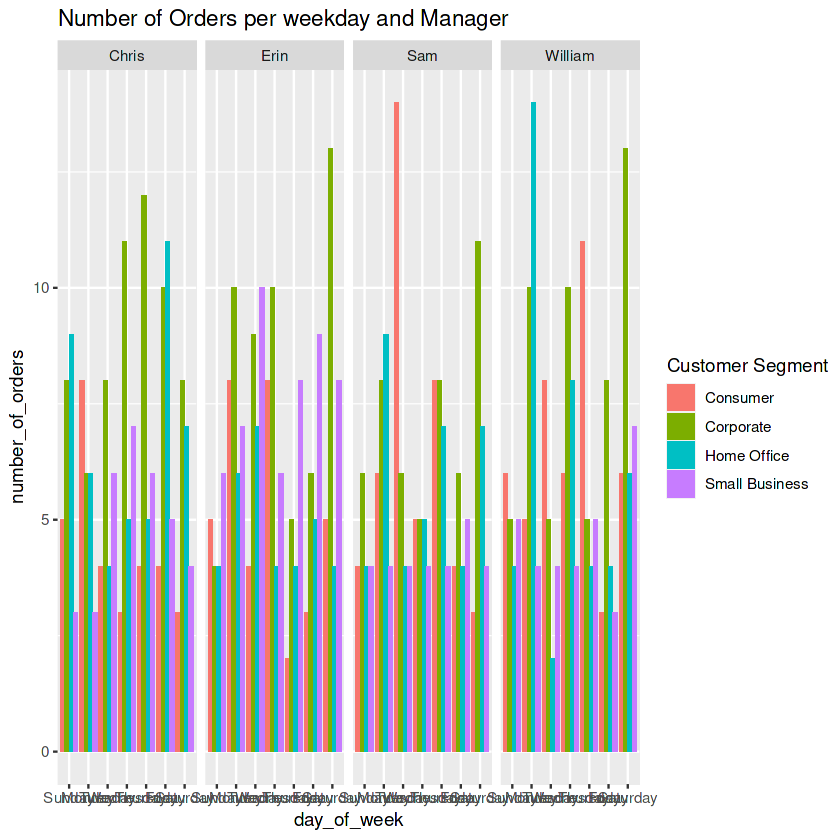

In [17]:
#Number of orders per weekday per manager 
Region %>% 
  filter(!is.na(average_duration)) %>% 
  ggplot(aes(x=day_of_week, y=number_of_orders, fill = `Customer Segment`)) +
  geom_col(position = "dodge")+
  facet_grid(~ Manager)+
  labs("text", title = "Number of Orders per weekday and Manager")
  theme(axis.text.x = element_text(angle = 90))

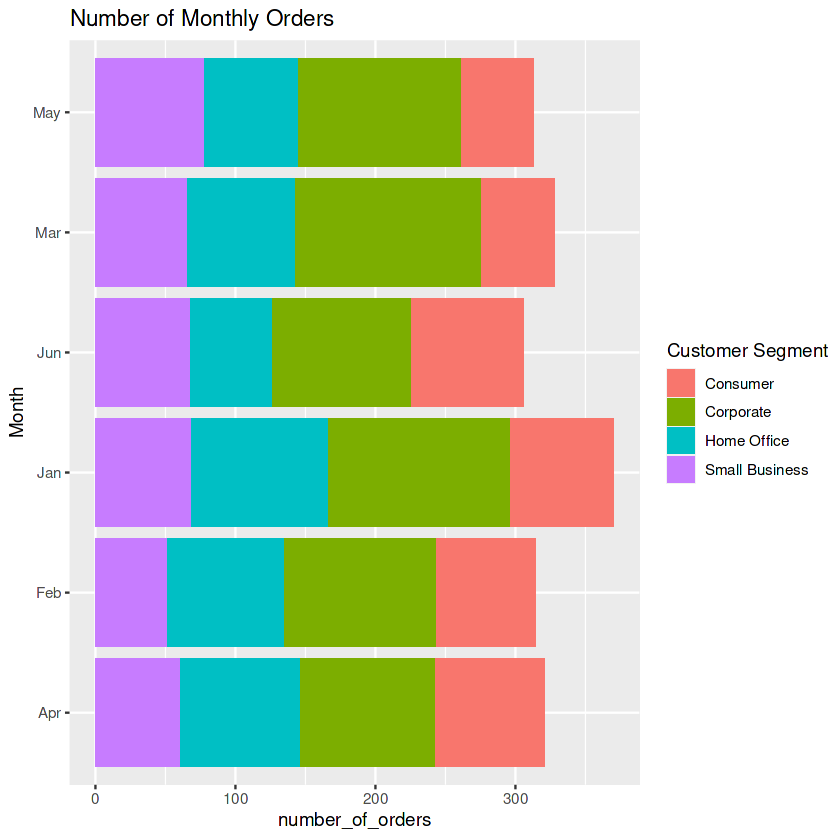

In [18]:
#number of orders per month
Region %>% 
 ggplot(aes(x=number_of_orders,y=Month, fill = `Customer Segment`))+
   geom_col()+
   labs("text", title = "Number of Monthly Orders ")+
   theme(axis.text.x = element_text(angle = 0))

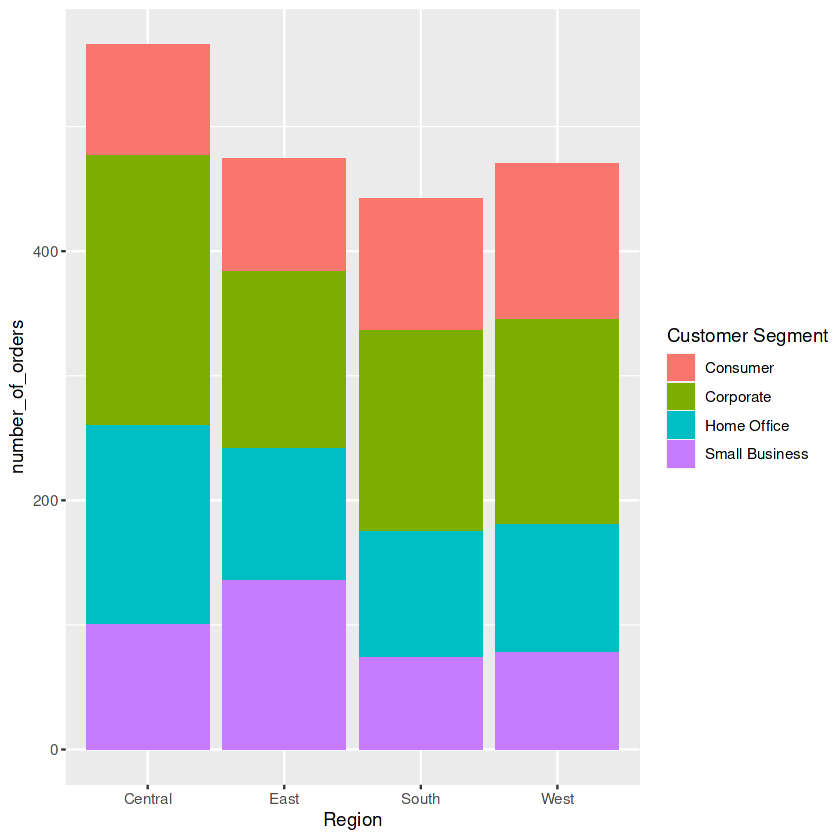

In [19]:
#Identify the region that shops the most
Region %>% 
  ggplot(aes(x=Region, y=number_of_orders, fill = `Customer Segment`))+
  geom_col(position = "stack")

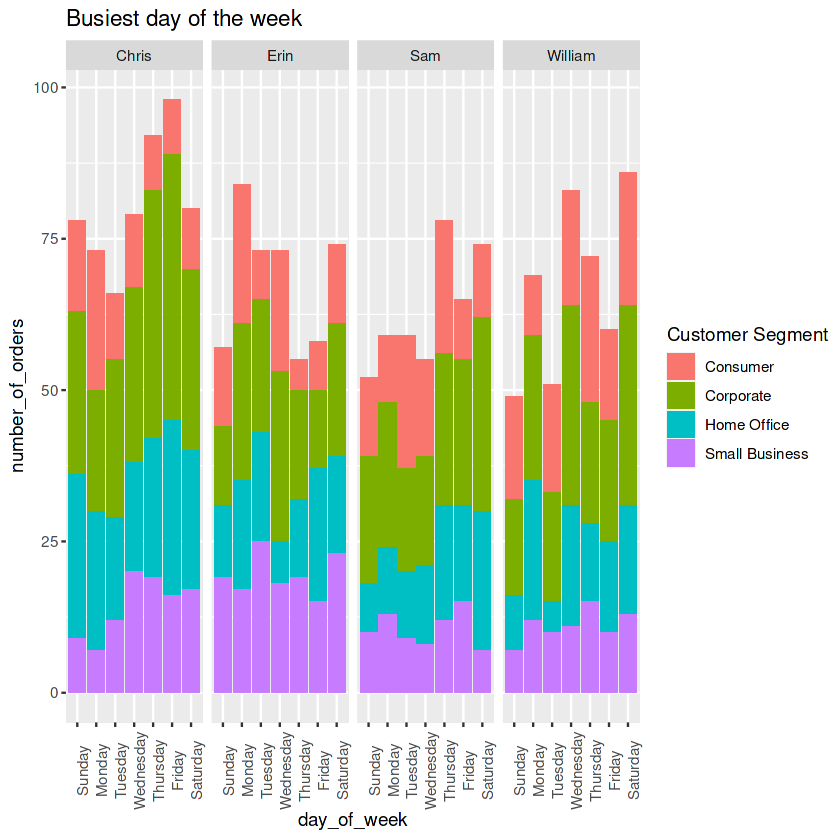

In [25]:
#Busiest day of the week
Region %>% 
  ggplot(aes(x=day_of_week, y=number_of_orders, fill = `Customer Segment`))+
  geom_col(position = "stack")+ facet_grid(~ Manager) + labs("text", title = "Busiest day of the week")+
  theme(axis.text.x = element_text(angle = 90))

In [26]:
#add clean data set from excel 
library(readxl)
all_data <- read_excel("../input/superstore-all-data/Superstore 2017_ all data .xlsx")
head(all_data)
str(all_data)

Warning message:
“Coercing text to numeric in K2236 / R2236C11: '05408'”
Warning message:
“Coercing text to numeric in K5276 / R5276C11: '05408'”
Warning message:
“Coercing text to numeric in K8800 / R8800C11: '05408'”
Warning message:
“Coercing text to numeric in K9148 / R9148C11: '05408'”
Warning message:
“Coercing text to numeric in K9149 / R9149C11: '05408'”
Warning message:
“Coercing text to numeric in K9150 / R9150C11: '05408'”
Warning message:
“Coercing text to numeric in K9388 / R9388C11: '05408'”
Warning message:
“Coercing text to numeric in K9389 / R9389C11: '05408'”
Warning message:
“Coercing text to numeric in K9390 / R9390C11: '05408'”
Warning message:
“Coercing text to numeric in K9391 / R9391C11: '05408'”
Warning message:
“Coercing text to numeric in K9743 / R9743C11: '05408'”


Row ID,Order ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Country,City,State,⋯,Person,Product_ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns
<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,⋯,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,No
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,⋯,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820,No
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,⋯,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714,No
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,⋯,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,No
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,⋯,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,No
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,⋯,Anna Andreadi,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694,No


tibble [9,994 × 22] (S3: tbl_df/tbl/data.frame)
 $ Row ID      : num [1:9994] 1 2 3 4 5 6 7 8 9 10 ...
 $ Order ID    : chr [1:9994] "CA-2016-152156" "CA-2016-152156" "CA-2016-138688" "US-2015-108966" ...
 $ Order_Date  : POSIXct[1:9994], format: "2016-11-08" "2016-11-08" ...
 $ Ship_Date   : POSIXct[1:9994], format: "2016-11-11" "2016-11-11" ...
 $ Ship_Mode   : chr [1:9994] "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer_ID : chr [1:9994] "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Segment     : chr [1:9994] "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country     : chr [1:9994] "United States" "United States" "United States" "United States" ...
 $ City        : chr [1:9994] "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State       : chr [1:9994] "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal_Code : num [1:9994] 42420 42420 90036 33311 33311 ...
 $ Region      : chr [1:9994] "South" "South" "West" "South" ...
 $

## Visualization
Visualisation of new clean data 

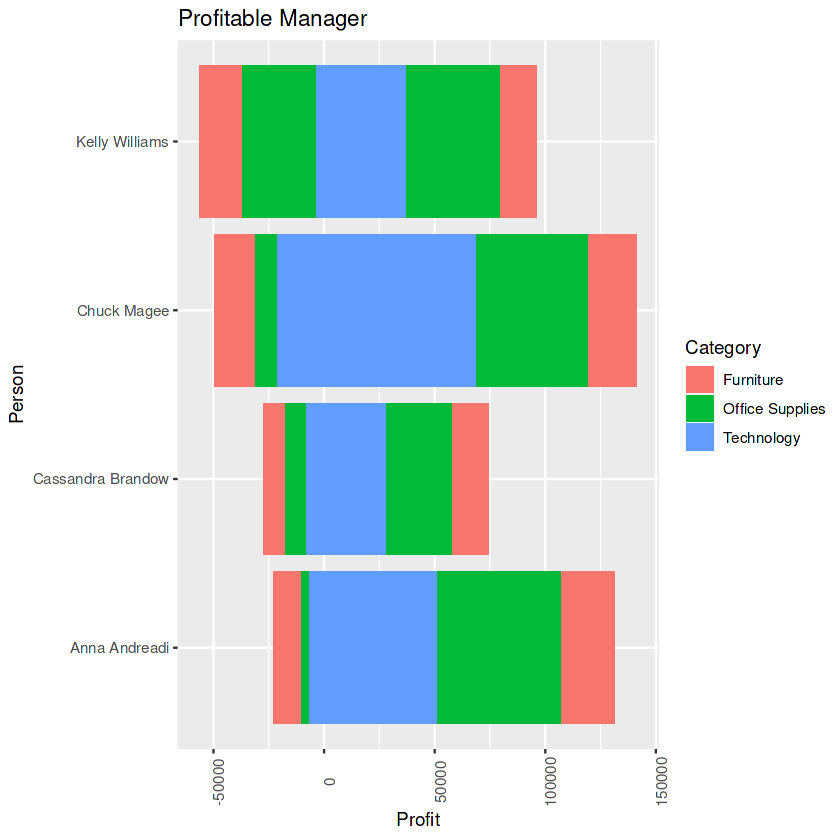

In [27]:
all_data %>%
  ggplot(aes(x=Profit, y=Person, fill = `Category`))+
  geom_col(position = "stack")+labs("text", title = "Profitable Manager")+
  theme(axis.text.x = element_text(angle = 90))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



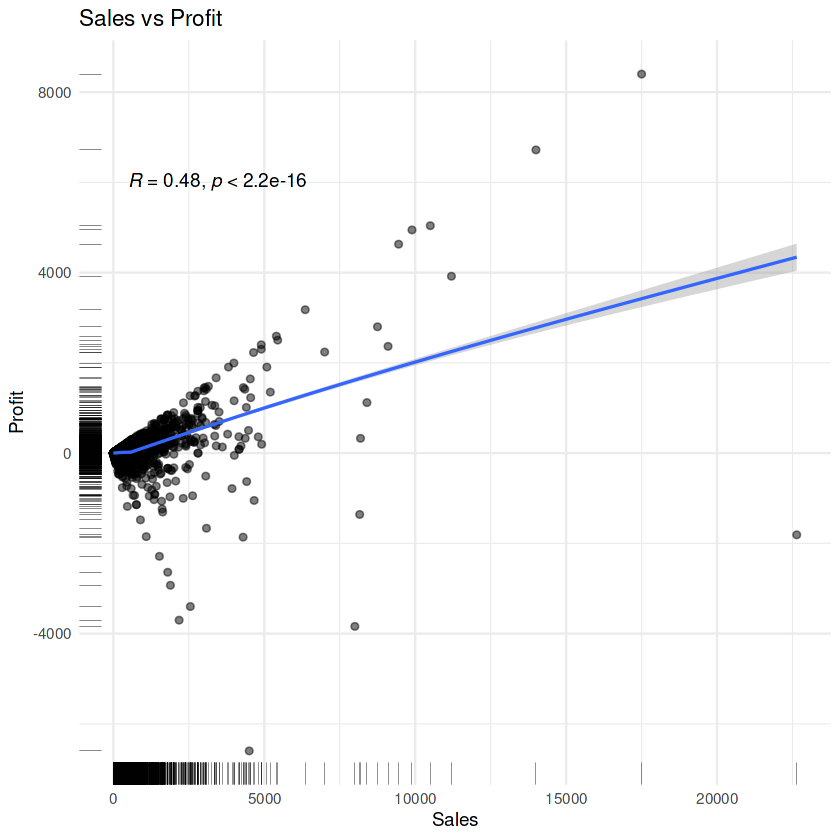

In [49]:
ggplot(data = all_data, mapping = aes(x= Sales, y= Profit))+
  geom_jitter(alpha=0.5)+geom_rug(position = "jitter", size=.09)+
  geom_smooth(size=0.7)+
  stat_cor(method = "pearson", label.x = 500, label.y = 6000)+
  labs(title = "Sales vs Profit", x="Sales", y="Profit")+
  theme_minimal()

A correlation coefficient of 0.48 suggests that there is a link between sales and profit that is reasonably strong. Rises in sales automatically result in gains in profitability, despite the fact that other factors may also impact such increases.